# Run Notebook
<hr style="clear:both">
In this notebook, you can train a model, perform inference, and generate a submission file
 for AIcrowd. As it is currently set up, running the notebook will only perform inference on the test set and create a CSV file corresponding to our best submission.

*Authors:* Mahmoud Dokmak, Romain Corbel, Guilhem Destriau

<hr style="clear:both">


In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ml-project-2-satnet

/content/drive/MyDrive/ml-project-2-satnet


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import warnings
from PIL import Image
from utils.helpers import *
from utils.mask_to_submission import *

warnings.filterwarnings("ignore")
os.environ["PYTHONPATH"] = "/content/drive/MyDrive/ml-project-2-satnet"

In [ ]:
!pip install torch torchvision tqdm

In [ ]:
# Compute the mean and the std on our 2600 images of our training dataset
#!python utils/data_normalization.py
# This cell took 11 min to run and outputed :
# Mean: tensor([0.3305, 0.3261, 0.2917])
# Standard Deviation: tensor([0.1894, 0.1836, 0.1829])

In [7]:
#!python utils/unet_trainer.py

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 63% 12/19 [00:54<00:32,  4.59s/it]
 68% 13/19 [00:59<00:27,  4.53s/it]
 74% 14/19 [01:03<00:21,  4.33s/it]
 79% 15/19 [01:07<00:17,  4.40s/it]
 84% 16/19 [01:11<00:12,  4.20s/it]
 89% 17/19 [01:16<00:08,  4.34s/it]
 95% 18/19 [01:20<00:04,  4.43s/it]
100% 19/19 [01:23<00:00,  4.42s/it]
------------------------------
Train Loss EPOCH 3: 0.3225
Valid Loss EPOCH 3: 0.3799
Train Accuracy EPOCH 3: 0.8300
Valid Accuracy EPOCH 3: 0.7996
Train F1 EPOCH 3: 0.4998
Valid F1 EPOCH 3: 0.5790
------------------------------
  6% 3/50 [1:11:20<14:27:06, 1106.95s/it]
  0% 0/75 [00:00<?, ?it/s]
  1% 1/75 [00:05<06:17,  5.10s/it]
  3% 2/75 [00:10<06:12,  5.10s/it]
  4% 3/75 [00:15<06:06,  5.10s/it]
  5% 4/75 [00:20<06:01,  5.09s/it]
  7% 5/75 [00:25<05:50,  5.01s/it]
  8% 6/75 [00:29<05:39,  4.92s/it]
  9% 7/75 [00:34<05:36,  4.95s/it]
 11% 8/75 [00:40<05:33,  4.98s/it]
 12% 9/75 [00:45<05:28,  4.98s/it]
 13% 10/75 [00:49<05:2

In [8]:
# It takes around 3 minutes to run on Google Colab
!python utils/unet_inference.py

Device:  cuda
/content/drive/MyDrive/ml-project-2-satnet/utils/unet_inference.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_pth

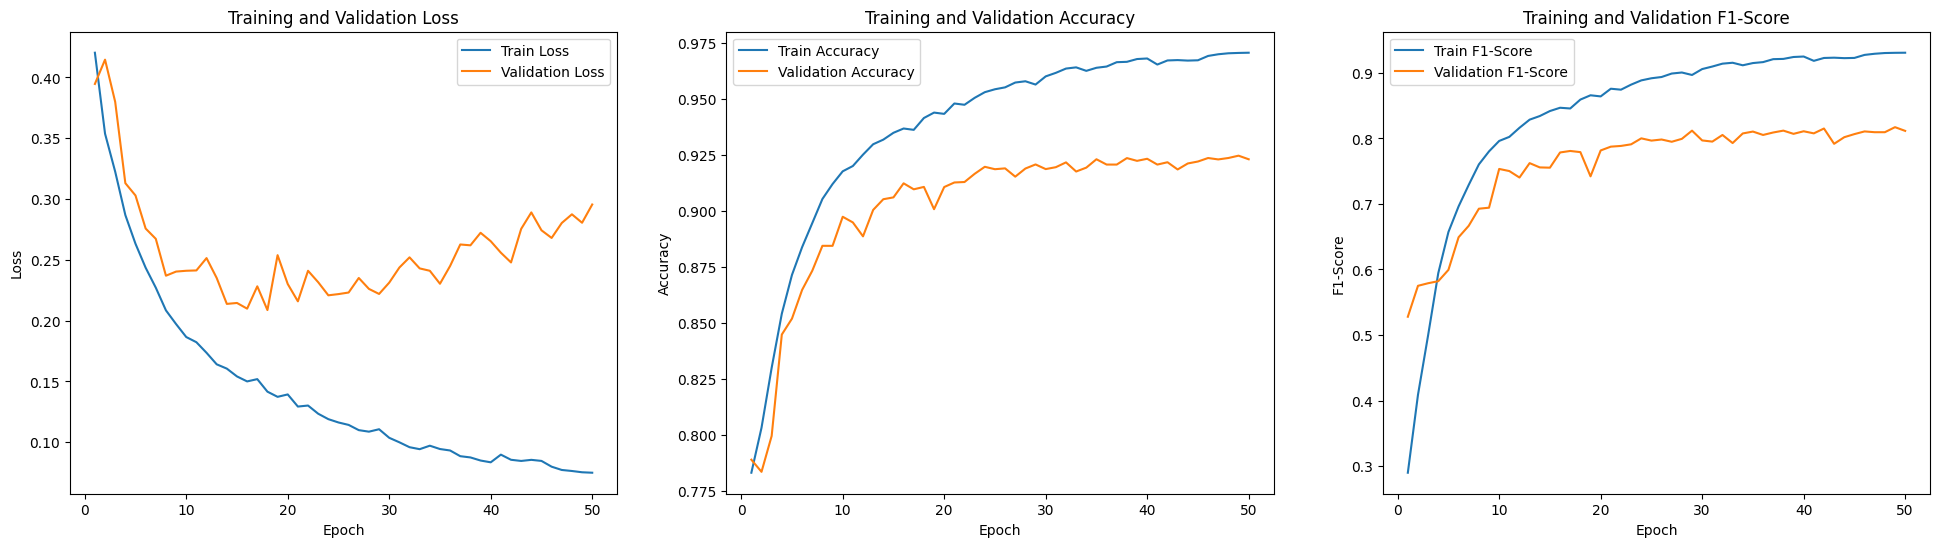

In [10]:
# Access to the metric dictionary json file
metrics = pd.read_json("models/metrics_final.json")
# print(metrics)

# Plotting the loss, the accuracy, and the F1 score on the training and validation set
plt.figure(figsize=(24, 6))

# Epoch starts at 1 and not 0
epochs = range(1, len(metrics["train_loss"]) + 1)

plt.subplot(1, 3, 1)
plt.plot(epochs, metrics["train_loss"], label="Train Loss")
plt.plot(epochs, metrics["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1, 3, 2)
plt.plot(epochs, metrics["train_accuracy"], label="Train Accuracy")
plt.plot(epochs, metrics["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 3, 3)
plt.plot(epochs, metrics["train_f1"], label="Train F1-Score")
plt.plot(epochs, metrics["val_f1"], label="Validation F1-Score")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.legend()
plt.title("Training and Validation F1-Score")

plt.show()

In [10]:
predicted = "dataset/test_dataset/predicted/"
submission_csv = "models/submission.csv"
names = [
    os.path.join(predicted, f) for f in os.listdir(predicted) if f.endswith(".png")
]

# Ensure that the images are sorted to respect the order
names.sort(key=lambda x: int(re.search(r"\d+", x).group()))
print("Collected image filenames:")
for name in names:
    print(name)

# Use the mask_to_submission function to create a csv file in the correct format
masks_to_submission(submission_csv, *names)
print(f"Submission file {submission_csv} created successfully.")

Collected image filenames:
dataset/test_dataset/predicted/predicted_test_1.png
dataset/test_dataset/predicted/predicted_test_2.png
dataset/test_dataset/predicted/predicted_test_3.png
dataset/test_dataset/predicted/predicted_test_4.png
dataset/test_dataset/predicted/predicted_test_5.png
dataset/test_dataset/predicted/predicted_test_6.png
dataset/test_dataset/predicted/predicted_test_7.png
dataset/test_dataset/predicted/predicted_test_8.png
dataset/test_dataset/predicted/predicted_test_9.png
dataset/test_dataset/predicted/predicted_test_10.png
dataset/test_dataset/predicted/predicted_test_11.png
dataset/test_dataset/predicted/predicted_test_12.png
dataset/test_dataset/predicted/predicted_test_13.png
dataset/test_dataset/predicted/predicted_test_14.png
dataset/test_dataset/predicted/predicted_test_15.png
dataset/test_dataset/predicted/predicted_test_16.png
dataset/test_dataset/predicted/predicted_test_17.png
dataset/test_dataset/predicted/predicted_test_18.png
dataset/test_dataset/predict

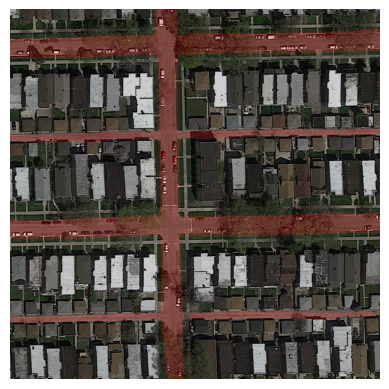

In [6]:
# Making and overlay image/groundtruth
img = np.array(Image.open("dataset/test_dataset/images/test_46.png").convert("RGB"))
grt = np.array(
    Image.open("dataset/test_dataset/predicted/predicted_test_46.png").convert("L")
)
grt = (grt > 128).astype(np.uint8)
overlay = make_img_overlay(img, grt)
plt.axis("off")
plt.imshow(overlay)
plt.show()